**World Happiness (2023) dataset features**
1. **Country name** :  Name of the country.
2. **Ladder score** :  Happiness score of the country, based on a survey.
3. **Standard error of ladder score** : Standard error associated with the happiness score.
4. **upperwhisker** : Upper limit of the confidence interval for the happiness score.
5. **lowerwhisker** : Lower limit of the confidence interval for the happiness score.
6. **Logged GDP per capita** : Log-transformed GDP per capita for the country.
7. **Social support** : Level of social support available to people in the country.
8. **Healthy life expectancy** : Average healthy life expectancy in the country.
9. **Freedom to make life choices** : Perception of freedom to make personal life decisions.
10. **Generosity** : Perceived generosity of people in the country.
11. **Perceptions of corruption** : Perceived level of corruption in the country.
12. **Ladder score in Dystopia** : Baseline score representing the lowest levels of happiness across hypothetical "Dystopia".
13. **Explained by : Log GDP per capita**: Contribution of GDP per capita to the happiness score.
14. **Explained by : Social support**: Contribution of social support to the happiness score.
15. **Explained by : Healthy life expectancy**: Contribution of healthy life expectancy to the happiness score.
16. **Explained by : Freedom to make life choices**: Contribution of perceived freedom to the happiness score.
17. **Explained by : Generosity**: Contribution of perceived generosity to the happiness score.
18. **Explained by**: **Perceptions of corruption**: Contribution of perceived corruption to the happiness score.
19. **Dystopia + Residual**: Combined contribution of unexplained factors and Dystopia baseline.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('/content/WHR2023.csv')
df.head()

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


**EDA Process :**

In [19]:
df.shape

(137, 19)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

In [63]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,1.360000e+02,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,5.544441,0.064515,5.670772,5.418015,9.455191,0.798632,64.967632,0.788081,0.023566,0.724588,1.778000e+00,1.408919,1.155088,0.366176,0.540912,0.149088,0.146478,1.777838
std,1.142841,0.022996,1.120442,1.166522,1.210107,0.129597,5.750390,0.112498,0.141604,0.177353,2.897251e-15,0.433969,0.327263,0.156691,0.149671,0.075993,0.127009,0.504390
min,1.859000,0.029000,1.923000,1.795000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000,1.778000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.110000
25%,4.702500,0.046750,4.939750,4.492250,8.587250,0.721000,60.648500,0.726250,-0.071000,0.666000,1.778000e+00,1.097750,0.959750,0.248500,0.458750,0.098500,0.059750,1.555250
50%,5.693500,0.060000,5.824000,5.550500,9.574500,0.826500,65.837500,0.801000,0.002000,0.772500,1.778000e+00,1.451500,1.225500,0.389500,0.557500,0.137500,0.112000,1.848500
75%,6.342500,0.076250,6.452000,6.244750,10.540250,0.896000,69.412500,0.874750,0.117500,0.846000,1.778000e+00,1.798000,1.401250,0.487500,0.656750,0.199250,0.188250,2.078750
max,7.804000,0.147000,7.875000,7.733000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000,1.778000e+00,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000,2.955000


In [21]:
print(df.isnull().sum())

Country name                                  0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       1
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           1
dtype: int64


We have only 1 null values in 3 columns so let's see which countries they are.

In [22]:
null_rows = df[df.isnull().any(axis=1)]
null_rows

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
98,State of Palestine,4.908,0.092,5.089,4.727,8.716,0.859,NaN,0.694,-0.132,0.836,1.778,1.144,1.309,NaN,0.416,0.065,0.067,NaN


As we can see there is only one row with 3 null values and it is the Sates of Palestine, since this country was in War in that particular year we are treating this as a outlier and avoid involving this country for out analysis because it may cause unnecessary deviation from our goal

In [23]:
df.dropna(inplace=True)

In [24]:
print(df.shape)    #palestain is removed

(136, 19)


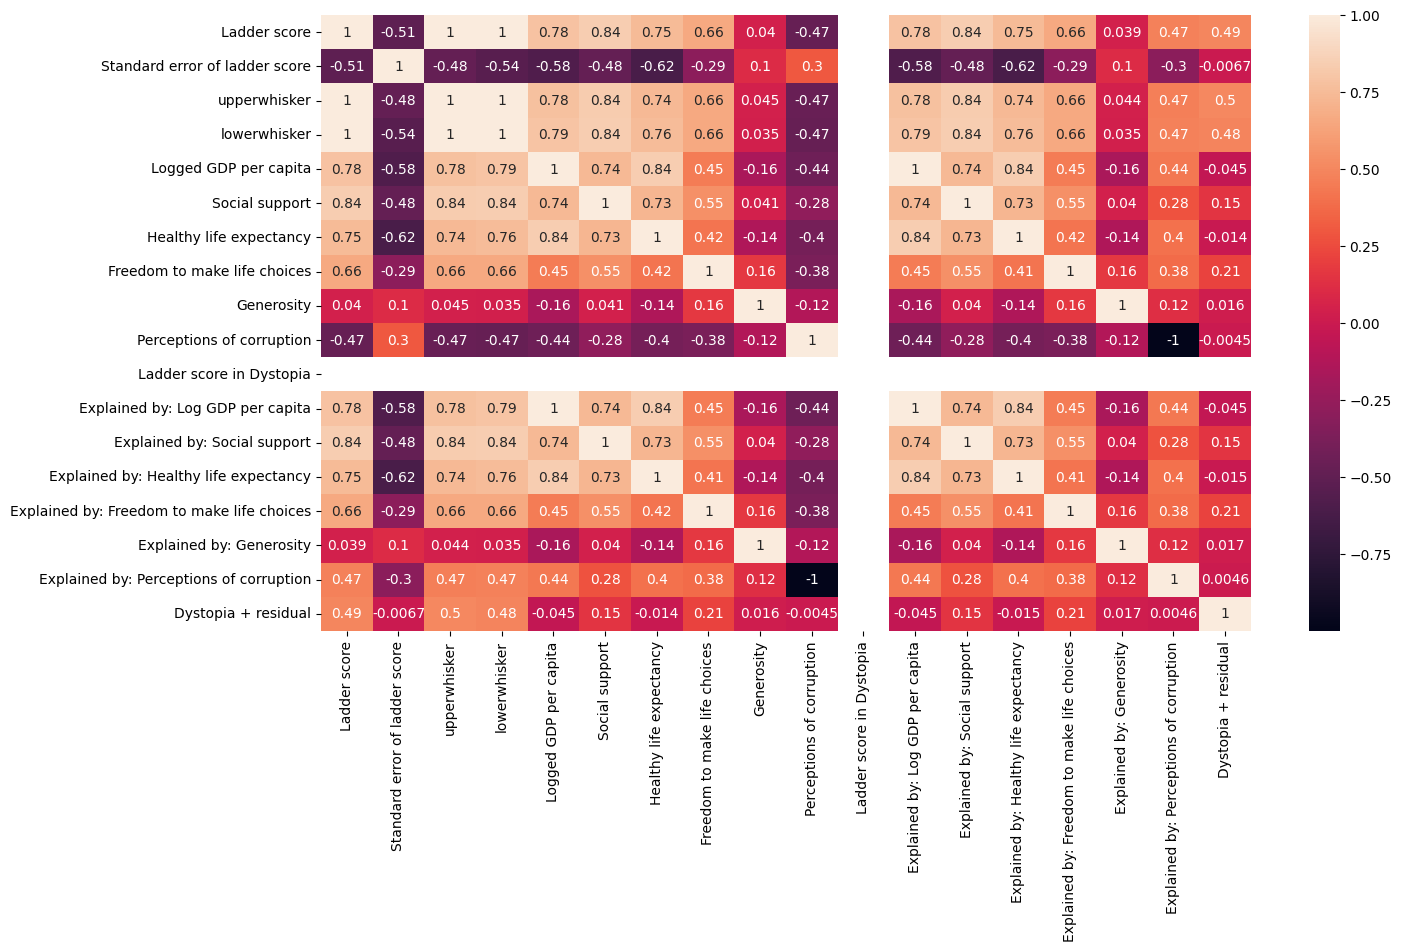

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(numeric_only = True), annot=True)
plt.show()

**Data** **Visualization**

In [53]:
top_10 = df.sort_values('Ladder score', ascending = False).head(10)
top_10

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110
5,Sweden,7.395,0.037,7.468,7.322,10.883,0.939,72.150,0.948,0.165,0.202,1.778,1.921,1.510,0.562,0.754,0.225,0.520,1.903
6,Norway,7.315,0.044,7.402,7.229,11.088,0.943,71.500,0.947,0.141,0.283,1.778,1.994,1.521,0.544,0.752,0.212,0.463,1.829
7,Switzerland,7.240,0.043,7.324,7.156,11.164,0.920,72.900,0.891,0.027,0.266,1.778,2.022,1.463,0.582,0.678,0.151,0.475,1.870
8,Luxembourg,7.228,0.069,7.363,7.093,11.660,0.879,71.675,0.915,0.024,0.345,1.778,2.200,1.357,0.549,0.710,0.149,0.418,1.845
9,New Zealand,7.123,0.038,7.198,7.048,10.662,0.952,70.350,0.887,0.175,0.271,1.778,1.842,1.544,0.513,0.672,0.230,0.471,1.852


Text(0.5, 1.0, 'Top 10 Happiest Country')

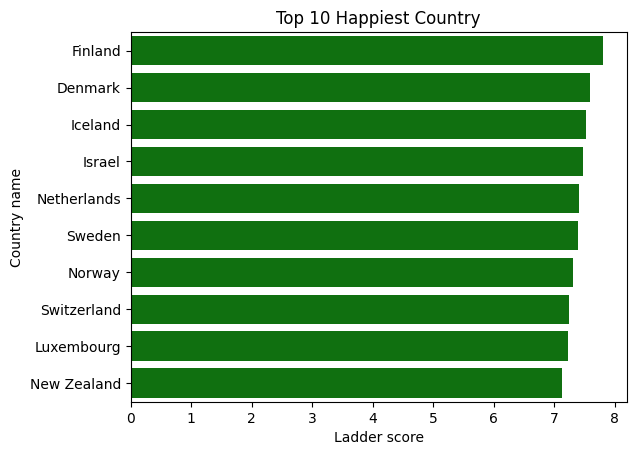

In [58]:
sns.barplot(x='Ladder score', y='Country name', data=top_10, orient='h', color='green')
plt.title("Top 10 Happiest Country")
# plt.show()

In [70]:
last_10 = df.sort_values('Ladder score', ascending=True).head(10)
last_10

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
136,Afghanistan,1.859,0.033,1.923,1.795,7.324,0.341,54.712,0.382,-0.081,0.847,1.778,0.645,0.000,0.087,0.000,0.093,0.059,0.976
135,Lebanon,2.392,0.044,2.479,2.305,9.478,0.530,66.149,0.474,-0.141,0.891,1.778,1.417,0.476,0.398,0.123,0.061,0.027,-0.110
134,Sierra Leone,3.138,0.082,3.299,2.976,7.394,0.555,54.900,0.660,0.105,0.858,1.778,0.670,0.540,0.092,0.371,0.193,0.051,1.221
133,Zimbabwe,3.204,0.061,3.323,3.084,7.641,0.690,54.050,0.654,-0.046,0.766,1.778,0.758,0.881,0.069,0.363,0.112,0.117,0.905
132,Congo (Kinshasa),3.207,0.095,3.394,3.020,7.007,0.652,55.375,0.664,0.086,0.834,1.778,0.531,0.784,0.105,0.375,0.183,0.068,1.162
131,Botswana,3.435,0.136,3.702,3.168,9.629,0.753,54.725,0.742,-0.215,0.830,1.778,1.471,1.041,0.087,0.480,0.021,0.071,0.264
130,Malawi,3.495,0.090,3.671,3.320,7.302,0.531,58.475,0.750,0.005,0.749,1.778,0.637,0.479,0.189,0.490,0.139,0.129,1.432
129,Comoros,3.545,0.117,3.774,3.317,8.075,0.471,59.425,0.470,-0.014,0.727,1.778,0.914,0.327,0.215,0.117,0.129,0.145,1.699
128,Tanzania,3.694,0.075,3.840,3.547,7.857,0.653,59.401,0.838,0.182,0.554,1.778,0.836,0.787,0.214,0.607,0.234,0.269,0.747
127,Zambia,3.982,0.094,4.167,3.797,8.074,0.694,55.032,0.791,0.098,0.818,1.778,0.914,0.890,0.095,0.545,0.189,0.080,1.270


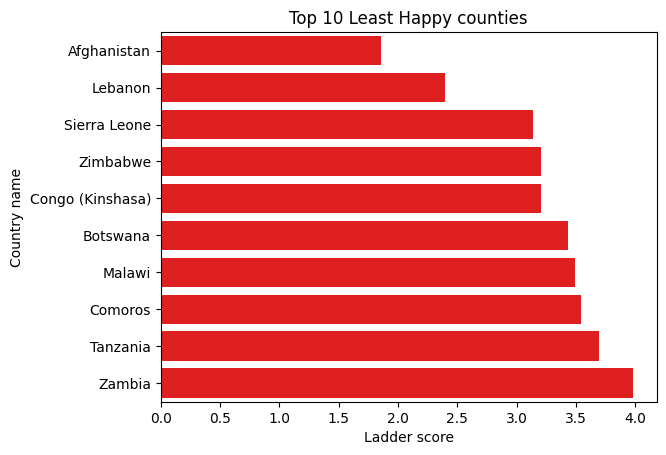

In [71]:
sns.barplot(x='Ladder score', y='Country name', data=last_10, orient='h', color='red')
plt.title("Top 10 Least Happy counties")
plt.show()

We infer that :
* Finland is the Happiest 2023 country in the world.
* Afganistan is the Least Happy country of 2023 in the world.

---

Using the below Columns we will try to gauge the impact of these columns contributing for the over all happiness score of the entire country.
* Explained by: Log GDP per capita
* Explained by: Social support
* Explained by: Healthy life expectancy
* Explained by: Freedom to make life choices
* Explained by: Generosity
* Explained by: Perceptions of corruption
* Dystopia + residual

We are using these columns because these columns are standardized and helps us to understand the graph in a better way

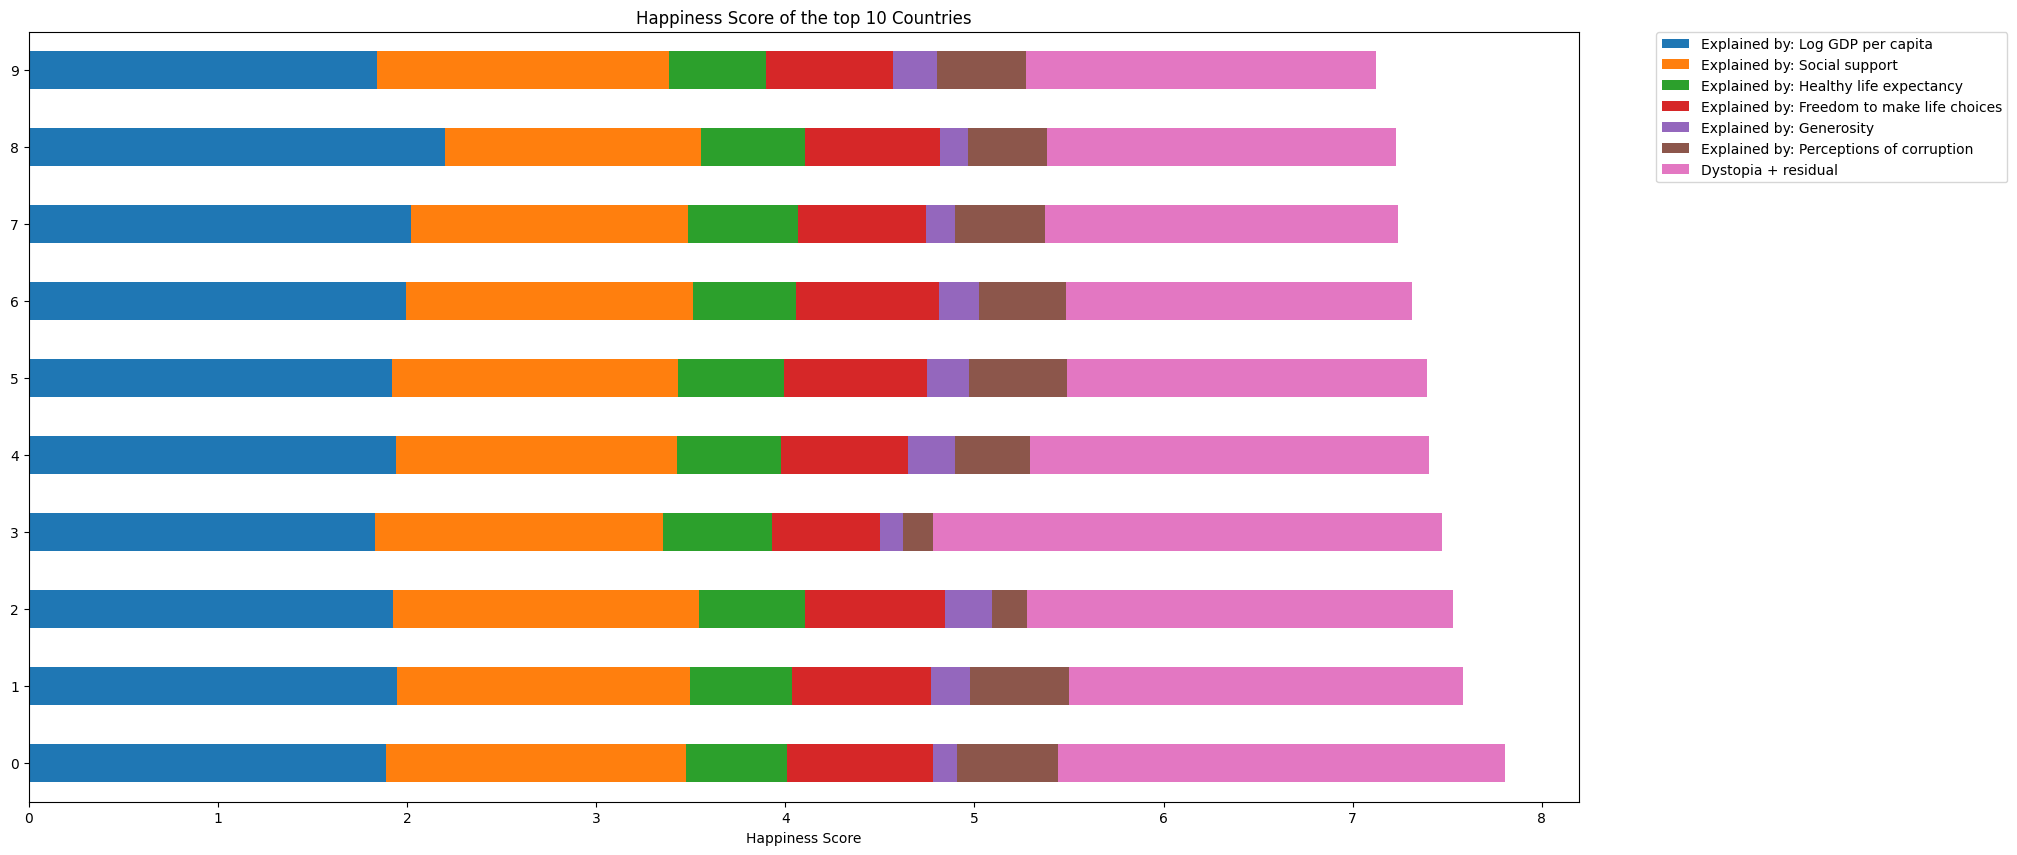

In [76]:
top_10[['Explained by: Log GDP per capita', 'Explained by: Social support','Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption',
    'Dystopia + residual']].plot(kind='barh',xticks=np.arange(9), stacked=True, figsize= (20, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

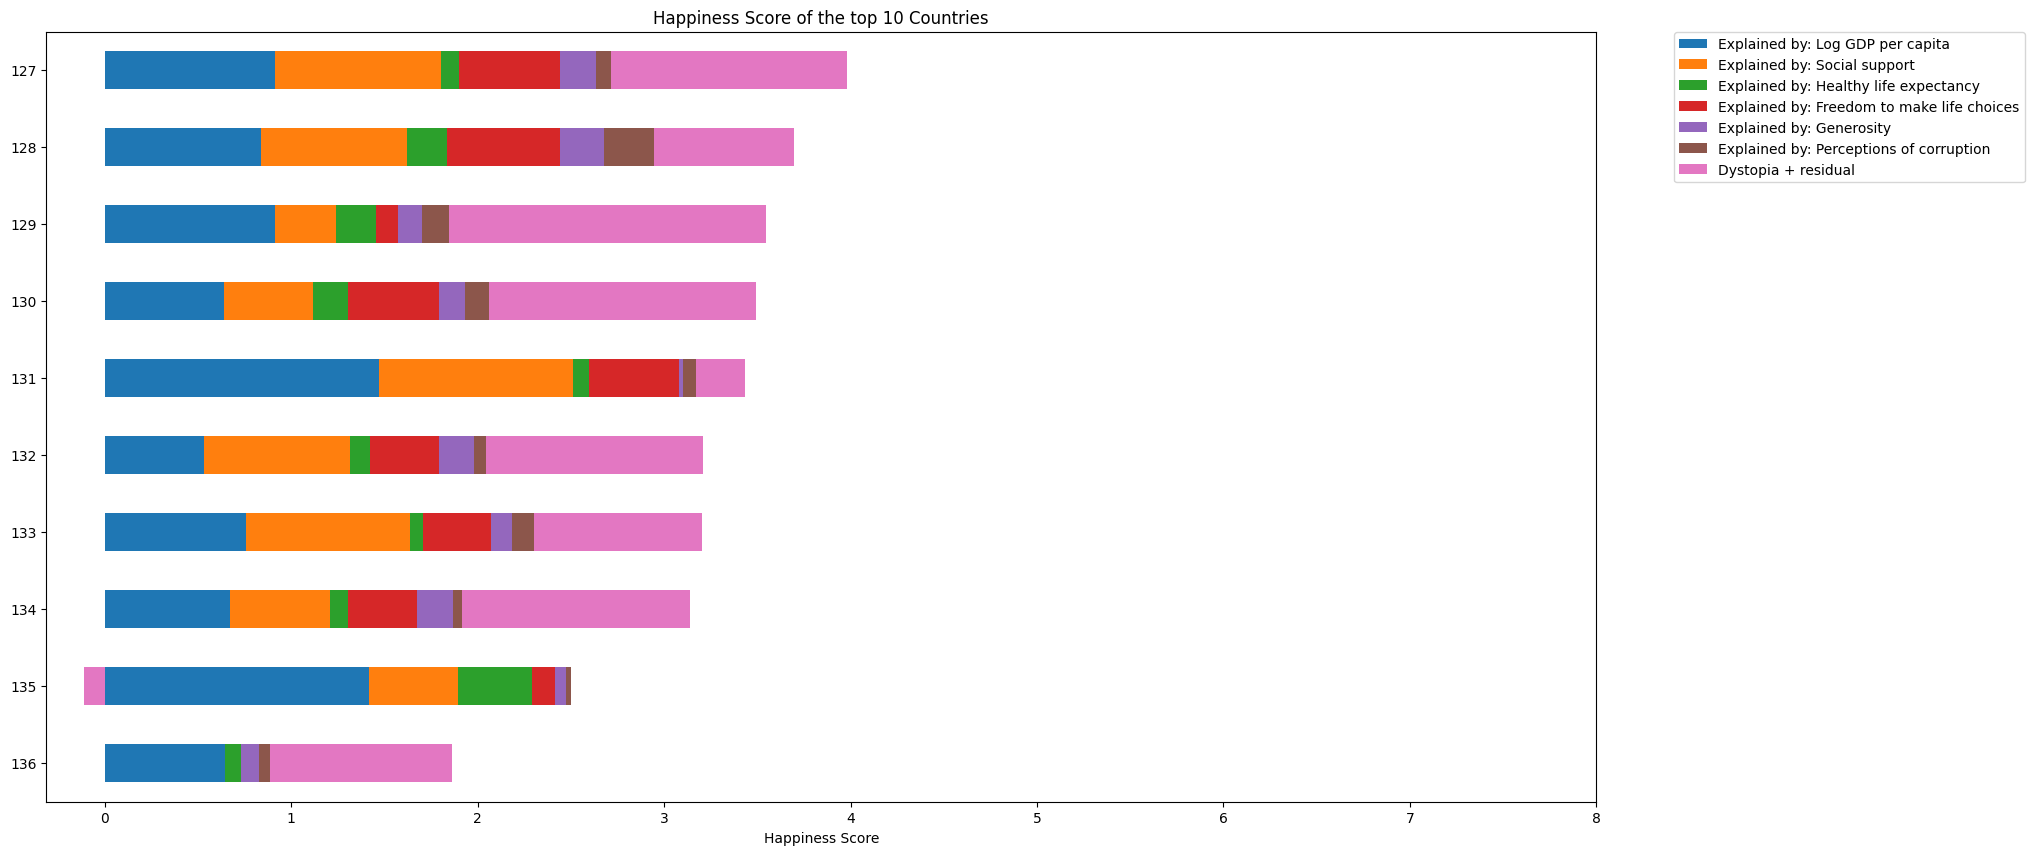

In [75]:
last_10[['Explained by: Log GDP per capita', 'Explained by: Social support','Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption',
    'Dystopia + residual']].plot(kind='barh',xticks=np.arange(9), stacked=True, figsize= (20, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

Stacked bar chart showing the effect of other columns aiding in total hapiness score of the top 10 and least 10 countries.

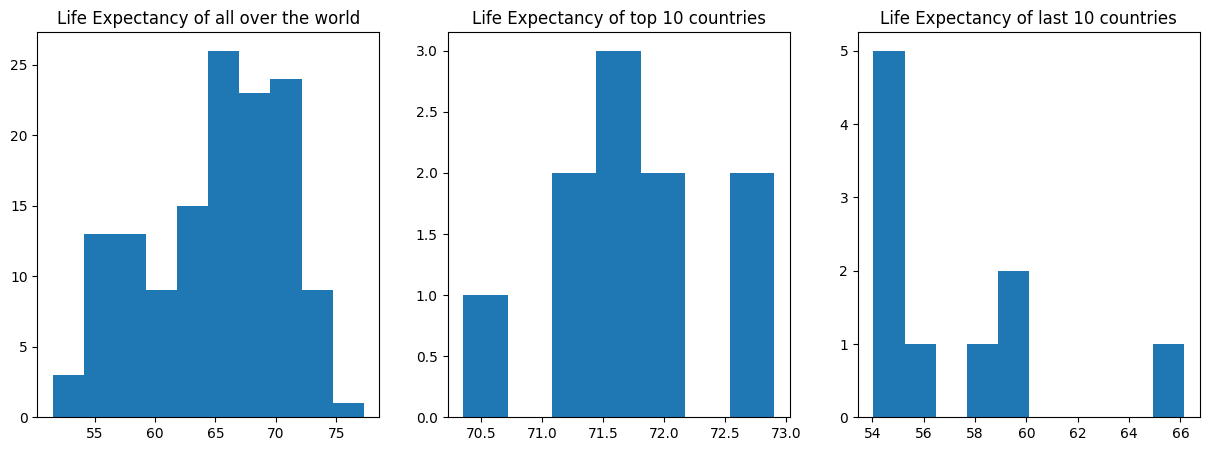

In [86]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(df['Healthy life expectancy'], bins=10)          #[45,50,55,60,65,70,75,80,85]
plt.title("Life Expectancy of all over the world")



plt.subplot(1,3,2)
plt.hist(top_10['Healthy life expectancy'], bins=7)
plt.title("Life Expectancy of top 10 countries")


plt.subplot(1,3,3)
plt.hist(last_10['Healthy life expectancy'])
plt.title("Life Expectancy of last 10 countries")

plt.show()

We infer that :
* Average life expectancy lies between 55 to 75
* Almost all the of the top happy counties has an average life expectancy of 70-75's
* Least happy counties has their average life expectancy in the 50's

With this thank you so much for going through my work till the end, feel free to get in touch if you have any doubt in my work.. :)